In [148]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from scipy.stats.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
df=pd.read_csv('/Users/laurakim/Downloads/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [125]:
#1.Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

Text(0.5, 1.0, 'reading score distribution')

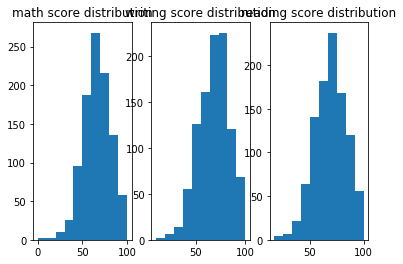

In [115]:
plt.subplot(1,3,1)
plt.hist(df['math score'])
plt.title('math score distribution')

plt.subplot(1,3,2)
plt.hist(df['writing score'])
plt.title('writing score distribution')

plt.subplot(1,3,3)
plt.hist(df['reading score'])
plt.title('reading score distribution')

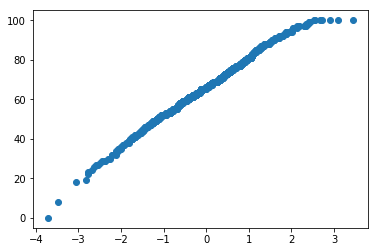

In [116]:
norm=np.random.normal(0,1,1000)
norm.sort()
x=list(df['math score'])
x.sort()
plt.plot(norm, x,'o')
plt.show()

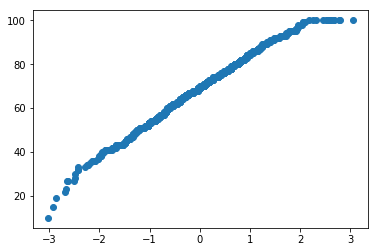

In [117]:
norm=np.random.normal(0,1,1000)
norm.sort()
x=list(df['writing score'])
x.sort()
plt.plot(norm, x,'o')
plt.show()

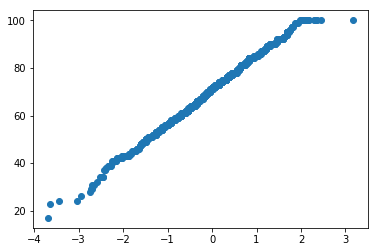

In [118]:
norm=np.random.normal(0,1,1000)
norm.sort()
x=list(df['reading score'])
x.sort()
plt.plot(norm, x,'o')
plt.show()

In [119]:
df.index[df['math score']==0]

Int64Index([59], dtype='int64')

In [120]:
df1=df.drop(df.index[59])
df1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [121]:
from scipy.stats import boxcox

In [127]:
math_boxcox,_=boxcox(df1['math score'])
reading_boxcox,_=boxcox(df1['reading score'])
writing_boxcox,_=boxcox(df1['writing score'])

Text(0.5, 1.0, 'reading score distribution')

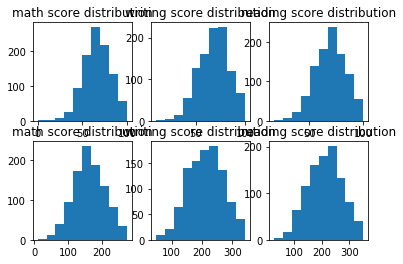

In [128]:
plt.subplot(2,3,1)
plt.hist(df['math score'])
plt.title('math score distribution')

plt.subplot(2,3,2)
plt.hist(df['writing score'])
plt.title('writing score distribution')

plt.subplot(2,3,3)
plt.hist(df['reading score'])
plt.title('reading score distribution')

plt.subplot(2,3,4)
plt.hist(math_boxcox)
plt.title('math score distribution')

plt.subplot(2,3,5)
plt.hist(reading_boxcox)
plt.title('writing score distribution')

plt.subplot(2,3,6)
plt.hist(writing_boxcox)
plt.title('reading score distribution')

In [130]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(math_boxcox)
norm_stats = normaltest(math_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_boxcox)
norm_stats = normaltest(reading_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_boxcox)
norm_stats = normaltest(writing_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1.7200980667409385 and p value is 0.4231413337632879
Normality test statistics is 1.8323072783414356 and p value is 0.40005484084042864
Jarque-Bera test statistics is 4.88915403217817 and p value is 0.08676282642086453
Normality test statistics is 6.546500085398799 and p value is 0.037883105073765445
Jarque-Bera test statistics is 5.762346713079429 and p value is 0.05606893537015201
Normality test statistics is 8.018367650263817 and p value is 0.018148201299612785


In [138]:
#p-value 5% as significant level.

In [131]:
df1['average score']=(df1['math score']+df1['reading score']+df1['writing score'])/3

In [132]:
df1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,77.333333
6,female,group B,some college,standard,completed,88,95,92,91.666667
7,male,group B,some college,free/reduced,none,40,43,39,40.666667
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000
9,female,group B,high school,free/reduced,none,38,60,50,49.333333


(array([  5.,  12.,  21.,  81., 154., 193., 227., 172.,  98.,  36.]),
 array([ 18.33333333,  26.5       ,  34.66666667,  42.83333333,
         51.        ,  59.16666667,  67.33333333,  75.5       ,
         83.66666667,  91.83333333, 100.        ]),
 <a list of 10 Patch objects>)

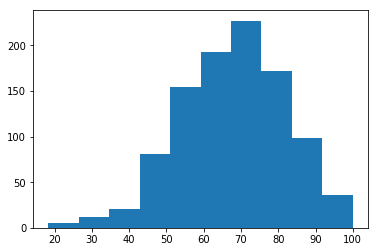

In [133]:
plt.hist(df1['average score'])

In [134]:
average_score_boxcox,_=boxcox(df1['average score'])

(array([  6.,  19.,  54., 141., 167., 209., 189., 122.,  63.,  29.]),
 array([ 37.32797692,  71.49212248, 105.65626804, 139.8204136 ,
        173.98455916, 208.14870471, 242.31285027, 276.47699583,
        310.64114139, 344.80528695, 378.96943251]),
 <a list of 10 Patch objects>)

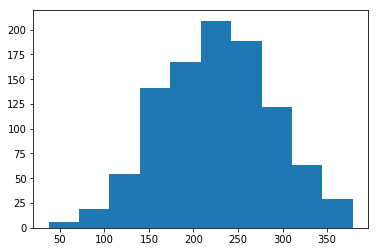

In [135]:
plt.hist(average_score_boxcox)

In [143]:
#average score after boxcox: histogram appears to have a normal distribution
#check with jarque_bera and normal test if the average score has normal distribution:

In [136]:
jb_stats = jarque_bera(df1['average score'])
norm_stats = normaltest(df1['average score'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 10.345394363749879 and p value is 0.0056692571616785425
Normality test statistics is 10.127189207749474 and p value is 0.006322790687068094


In [140]:
jb_stats = jarque_bera(average_score_boxcox)
norm_stats = normaltest(average_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
jb_stats

Jarque-Bera test statistics is 3.43238469091119 and p value is 0.17974926966382188
Normality test statistics is 4.2198799787036805 and p value is 0.12124524222063908


(3.43238469091119, 0.17974926966382188)

In [139]:
#p-value 5% significant level:
#before boxcox, less than 5% (not a normal distribution).  After boxcox, higher than 5% (normal distribution).

In [147]:
df1.groupby(['gender'])['average score'].mean()

gender
female    69.686654
male      65.837483
Name: average score, dtype: float64

In [149]:
ttest_ind(df1[df1['gender']=='female']['average score'], df1[df1['gender']=='male']['average score'])

Ttest_indResult(statistic=4.33677778857033, pvalue=1.592773074984749e-05)

In [150]:
#gender appears to play a role in affecting the average score (female higher)

In [153]:
df1.groupby(['lunch'])['average score'].mean()

lunch
free/reduced    62.349341
standard        70.837209
Name: average score, dtype: float64

In [154]:
ttest_ind(df1[df1['lunch']=='free/reduced']['average score'], df1[df1['lunch']=='standard']['average score'])

Ttest_indResult(statistic=-9.467780356657299, pvalue=1.9981012822755923e-20)

In [155]:
#lunch appears to play a role in affecting the average score (standard higher)

In [156]:
df1.groupby(['test preparation course'])['average score'].mean()

test preparation course
completed    72.669460
none         65.126365
Name: average score, dtype: float64

In [157]:
ttest_ind(df1[df1['test preparation course']=='none']['average score'], df1[df1['test preparation course']=='completed']['average score'])

Ttest_indResult(statistic=-8.357919651293466, pvalue=2.1255569449300805e-16)

In [158]:
#test prep course appears to play a role in affecting the average score (completed higher)

In [159]:
df1.groupby(['race/ethnicity'])['average score'].mean()

race/ethnicity
group A    62.992509
group B    65.468421
group C    67.314465
group D    69.179389
group E    72.752381
Name: average score, dtype: float64

In [164]:
race = df1["race/ethnicity"].unique()
for i in range(0, len(race)):
    for j in range(i+1, len(race)):
        print(
            "t-test between groups {0} and {1}:".format(race[i], race[j]))
        print(ttest_ind(
            df1[df1["race/ethnicity"]
                        == race[i]]['average score'],
            df1[df1["race/ethnicity"] == race[j]]['average score']
            ))

t-test between groups group B and group C:
Ttest_indResult(statistic=-1.4405954858885, pvalue=0.15031746511041588)
t-test between groups group B and group A:
Ttest_indResult(statistic=1.3165043669633527, pvalue=0.1890930589509443)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.8031083992077255, pvalue=0.005279949204374891)
t-test between groups group B and group E:
Ttest_indResult(statistic=-4.46037807261396, pvalue=1.1254806793764281e-05)
t-test between groups group C and group A:
Ttest_indResult(statistic=2.628074738662737, pvalue=0.008913350965902764)
t-test between groups group C and group D:
Ttest_indResult(statistic=-1.6691601835550827, pvalue=0.09562713484084166)
t-test between groups group C and group E:
Ttest_indResult(statistic=-3.8749879964714253, pvalue=0.00012226281376633653)
t-test between groups group A and group D:
Ttest_indResult(statistic=-3.7179415923386636, pvalue=0.00023390416748799778)
t-test between groups group A and group E:
Ttest_indRe

In [165]:
parent = df1["parental level of education"].unique()
for i in range(0, len(parent)):
    for j in range(i+1, len(parent)):
        print(
            "t-test between groups {0} and {1}:".format(parent[i], parent[j]))
        print(ttest_ind(
            df1[df1["parental level of education"]
                        == parent[i]]['average score'],
            df1[df1["parental level of education"] == parent[j]]['average score']
            ))

t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=2.200746866670862, pvalue=0.028421853941795295)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.7594769500339048, pvalue=0.4485891321202008)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=1.5013009645983189, pvalue=0.13421131516223408)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=5.539323736236874, pvalue=6.457780161976827e-08)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.847343464477865, pvalue=0.00014647051034898443)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-2.5596520690466438, pvalue=0.010997532204148747)
t-test between groups some college and associate's degree:
Ttest_indResult(statistic=-0.8445790843436104, pvalue=0.3987986989245852)
t-test between groups some college and high school:
Ttest_in

In [166]:
#differences in average score between students with different parental level of education and race/ethnicity are present